In [27]:
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
mpl.style.use('bmh')

In [28]:
from lint_analysis.bin_counts.models import BinCount

In [66]:
import numpy as np

def plot_hist(token, y1=None, y2=None, rel=False):
    
    print(token)
    
    series = BinCount.token_series(token, year1=y1, year2=y2)
    
    if rel:
        series /= series.sum()
    
    plt.figure(figsize=(20, 10))
    plt.bar(np.arange(len(series)), series)

    plt.title('"{}"'.format(token))
    plt.xlabel('Narrative time')
    plt.ylabel('Word count')
    plt.show()

marriage


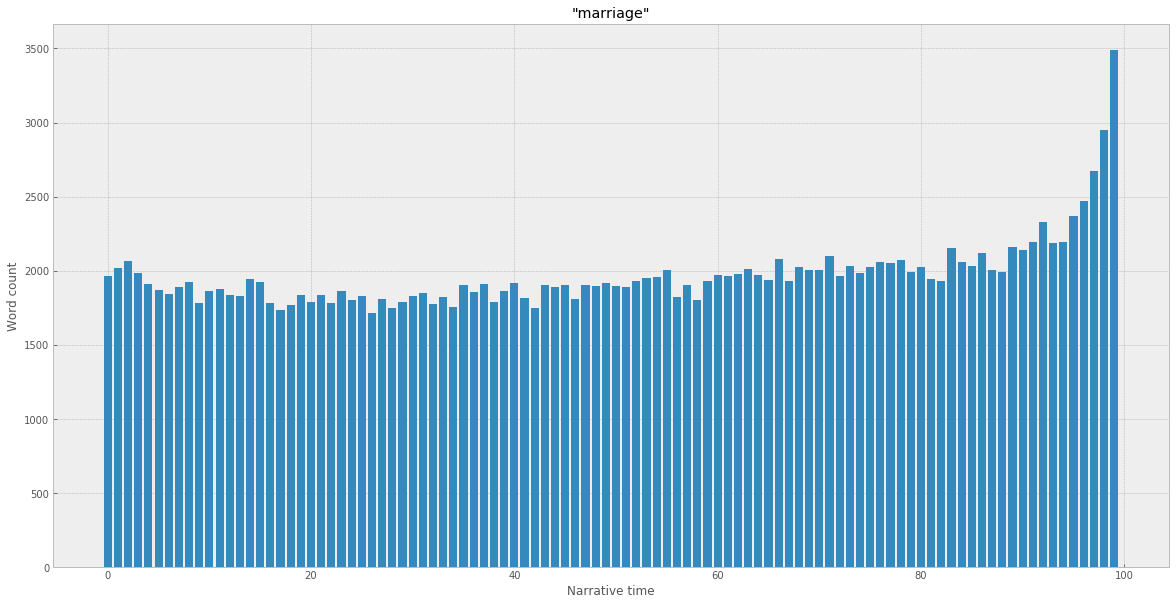

death


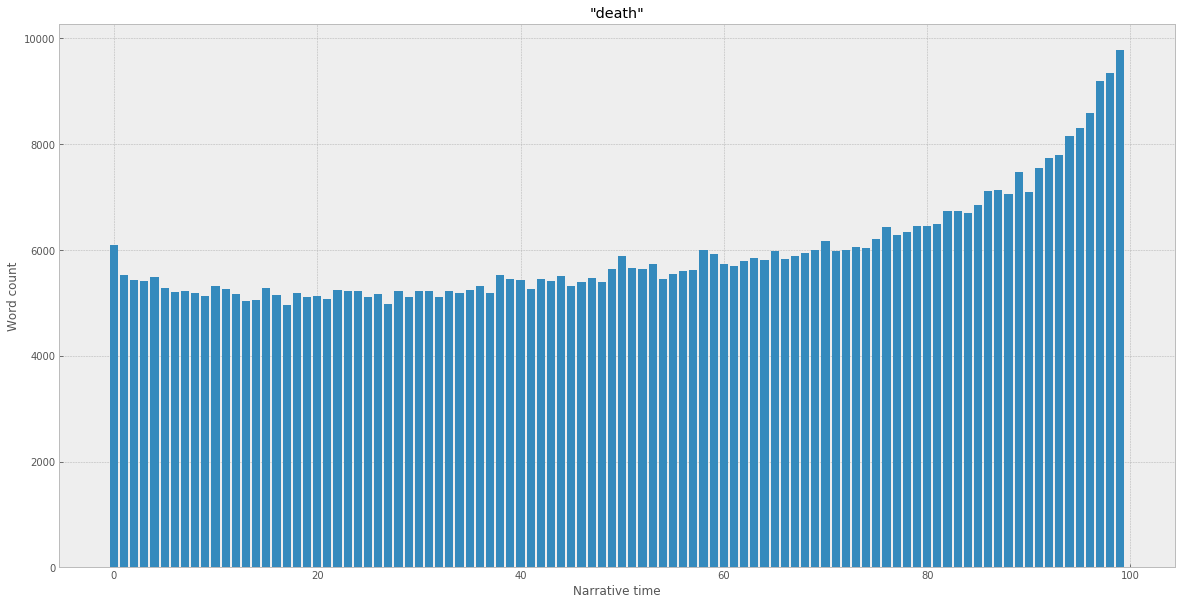

childhood


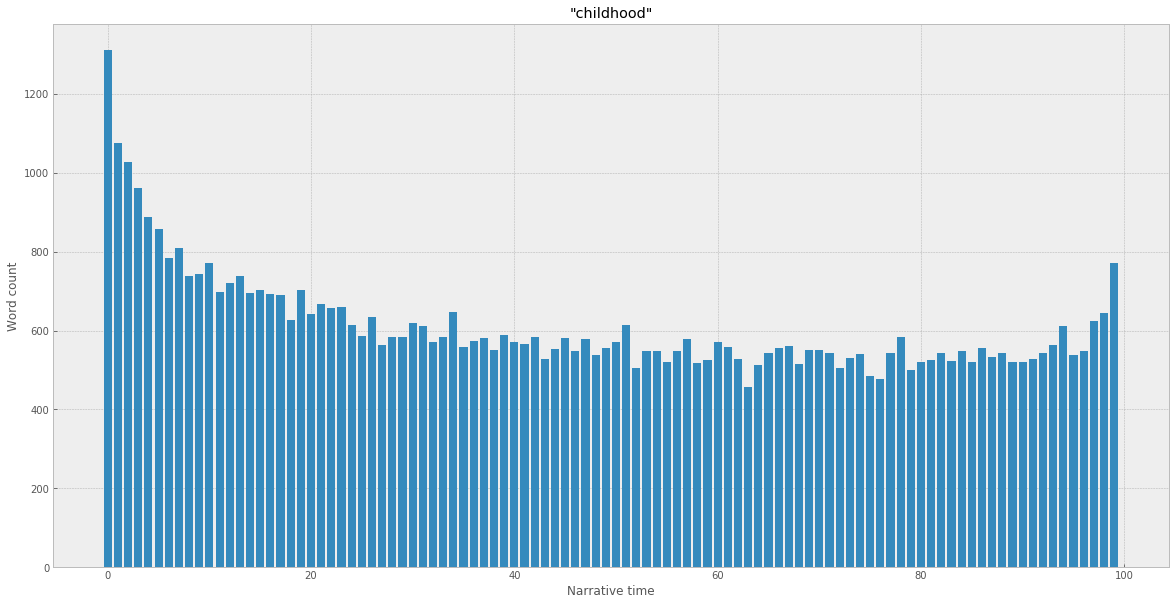

youth


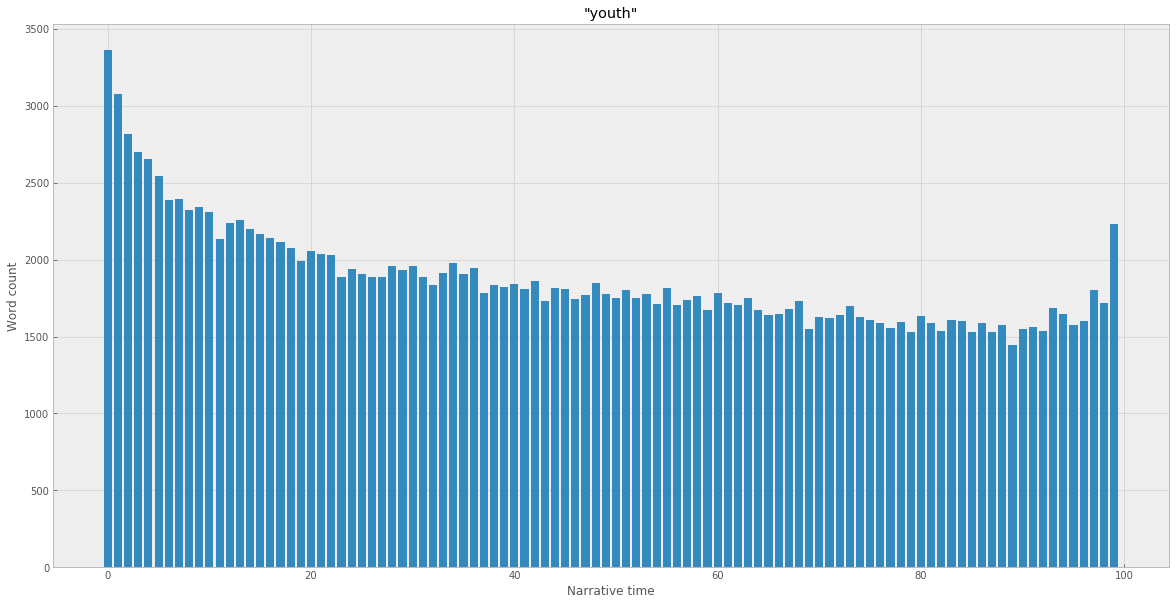

In [67]:
plot_hist('marriage')
plot_hist('death')
plot_hist('childhood')
plot_hist('youth')

In [31]:
def plot_cohort(*tokens, w=8, h=8):
    
    plt.figure(figsize=(w, h))
    
    lines = []
    for token in tokens:
        
        series = BinCount.token_series(token)
        line, = plt.plot(series/series.sum(), label=token)
        lines.append(line)
        
    plt.legend(
        handles=lines,
        bbox_to_anchor=(1.03, 1),
        loc=2,
        borderaxespad=0,
    )
    
    plt.xlabel('Narrative time')
    plt.ylabel('Relative frequency')
    plt.show()

In [34]:
def plot_cohort_colors(*tokens, w=8, h=8):
    
    plt.figure(figsize=(w, h))
    
    lines = []
    for token, color in tokens:
        
        series = BinCount.token_series(token)
        line, = plt.plot(series/series.sum(), label=token, c=color)
        lines.append(line)
        
    plt.legend(
        handles=lines,
        bbox_to_anchor=(1.03, 1),
        loc=2,
        borderaxespad=0,
    )
    
    plt.xlabel('Narrative time')
    plt.ylabel('Relative frequency')
    plt.show()

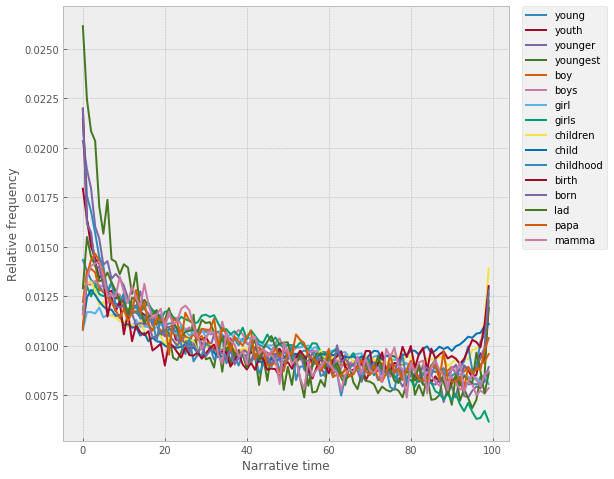

In [32]:
plot_cohort(
    'young',
    'youth',
    'younger',
    'youngest',
    'boy',
    'boys',
    'girl',
    'girls',
    'children',
    'child',
    'childhood',
    'birth',
    'born',
    'lad',
    'papa',
    'mamma',
)

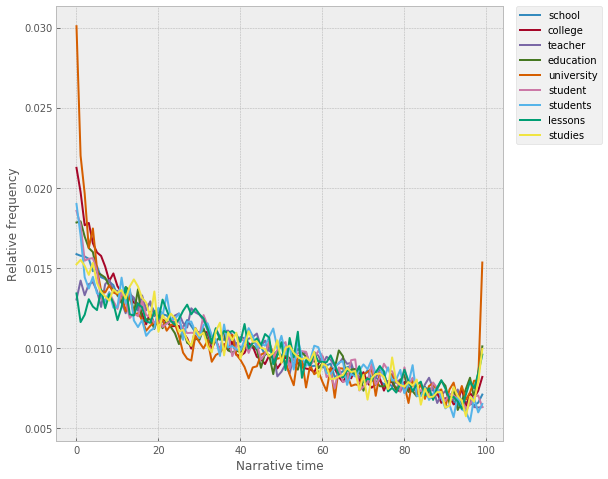

In [33]:
plot_cohort(
    'school',
    'college',
    'teacher',
    'education',
    'university',
    'student',
    'students',
    'lessons',
    'studies',
)

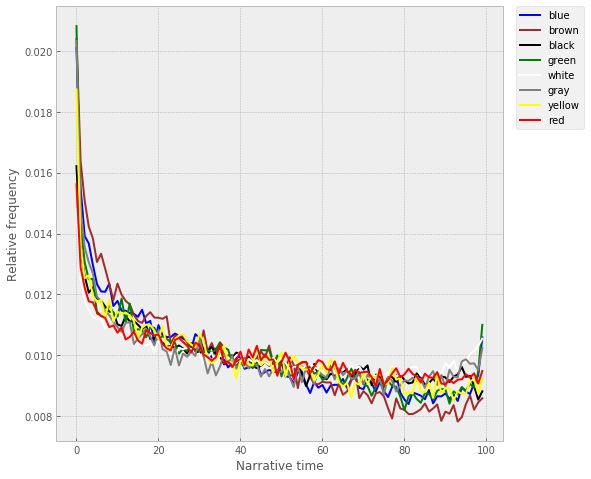

In [35]:
plot_cohort_colors(
    ('blue', 'blue'),
    ('brown', 'brown'),
    ('black', 'black'),
    ('green', 'green'),
    ('white', 'white'),
    ('gray', 'gray'),
    ('yellow', 'yellow'),
    ('red', 'red'),
)

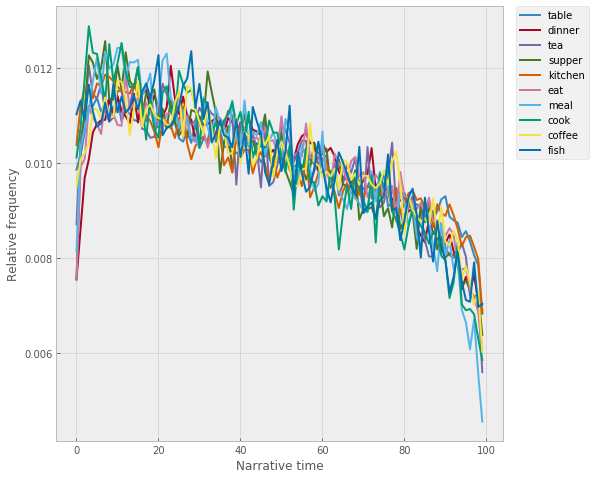

In [36]:
plot_cohort(
    'table',
    'dinner',
    'tea',
    'supper',
    'kitchen',
    'eat',
    'meal',
    'cook',
    'coffee',
    'fish',
)

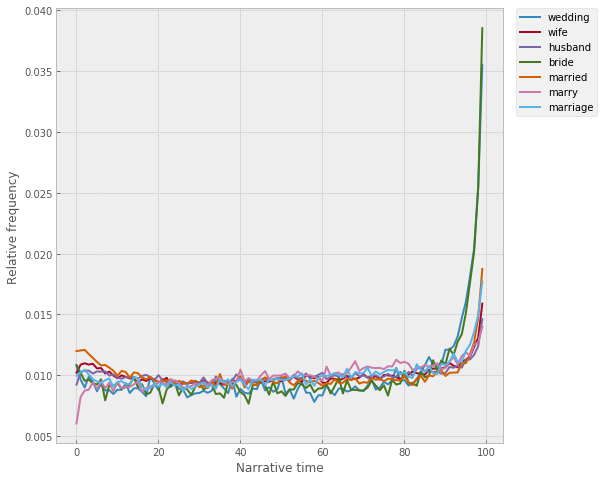

In [37]:
plot_cohort(
    'wedding',
    'wife',
    'husband',
    'bride',
    'married',
    'marry',
    'marriage',
)

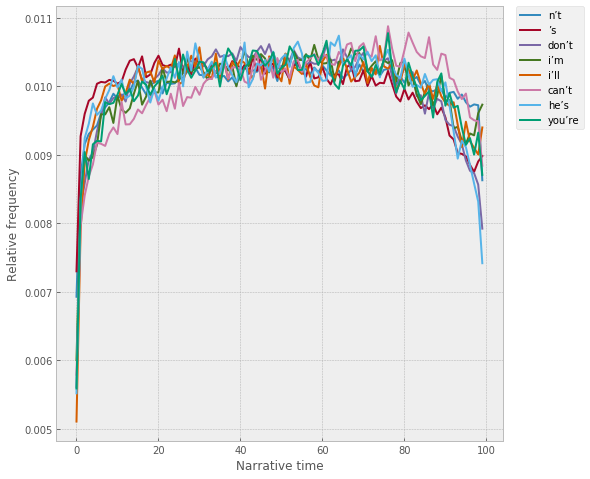

In [42]:
plot_cohort(
    "n’t",
    "’s",
    "don’t",
    "i’m",
    "i’ll",
    "can’t",
    "he’s",
    "you’re",
)

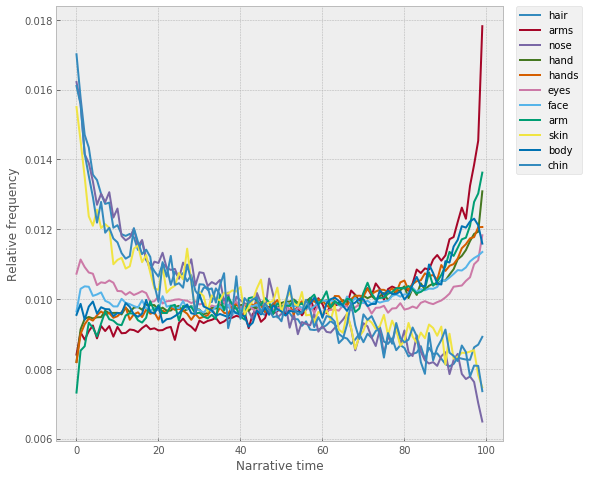

In [38]:
plot_cohort(
    'hair',
    'arms',
    'nose',
    'hand',
    'hands',
    'eyes',
    'face',
    'arm',
    'skin',
    'body',
    'chin',
)

a


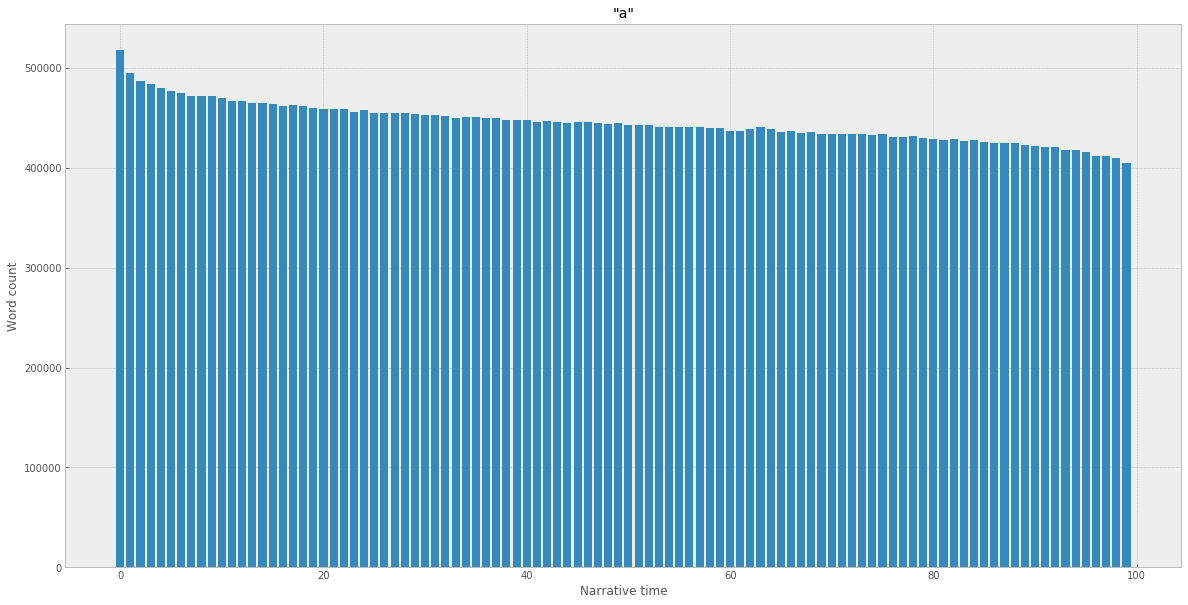

an


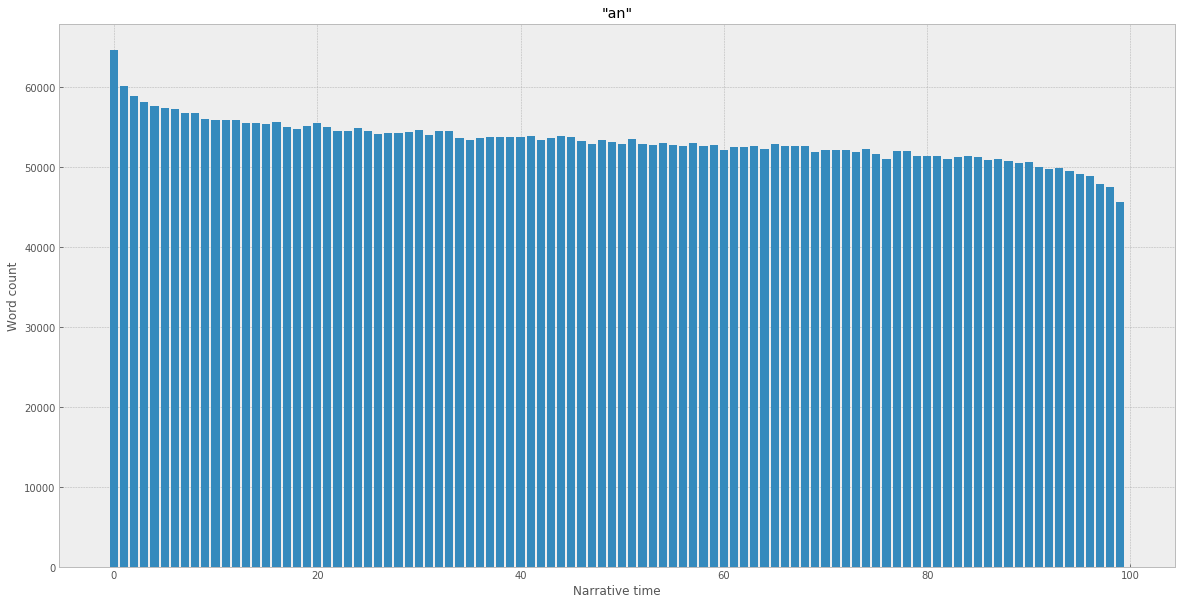

the


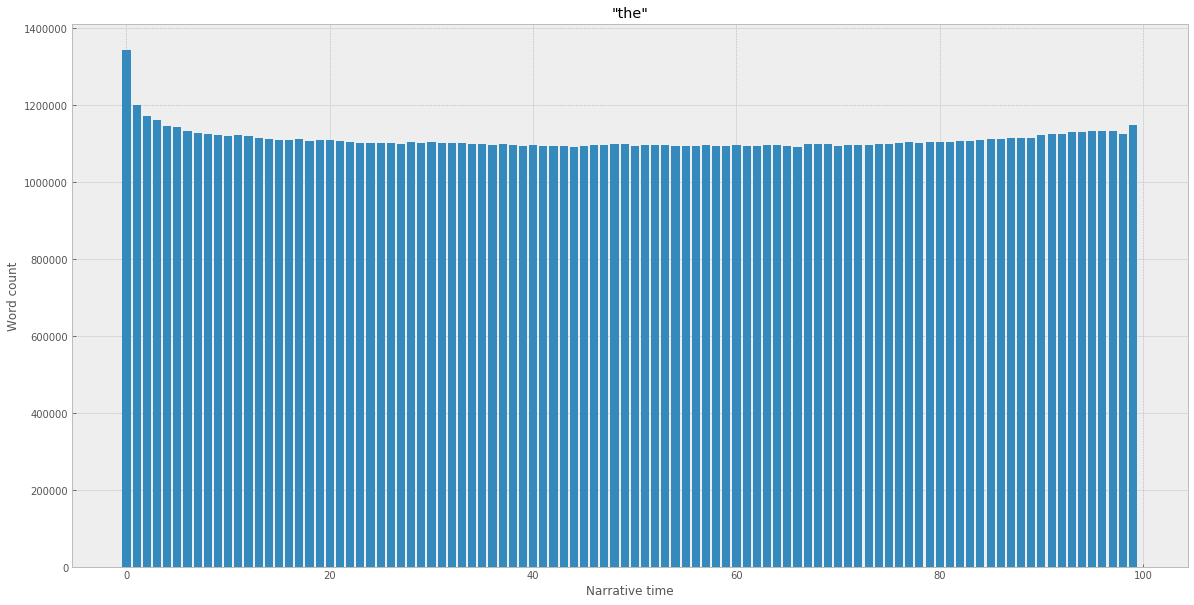

In [54]:
plot_hist('a')
plot_hist('an')
plot_hist('the')

In [40]:
import math

def plot_series(token, w=8, h=8):
    
    series = BinCount.token_series(token)
    
    n = series.sum()
    p = 1 / len(series)
    
    mean = n * p
    var = mean * (1-p)
    std = math.sqrt(var)

    plt.figure(figsize=(w,h))
    
    plt.plot([0, 100], [mean, mean], c='orange', lw=0.5)

    plt.fill_between(
        range(101),
        mean + 2*std,
        mean - 2*std,
        color='black',
        alpha=0.1,
    )
    
    print(token)
    
    plt.title(token)
    plt.xlabel('Narrative time')
    plt.xlabel('Word count')
    plt.plot(series)
    plt.show()

a


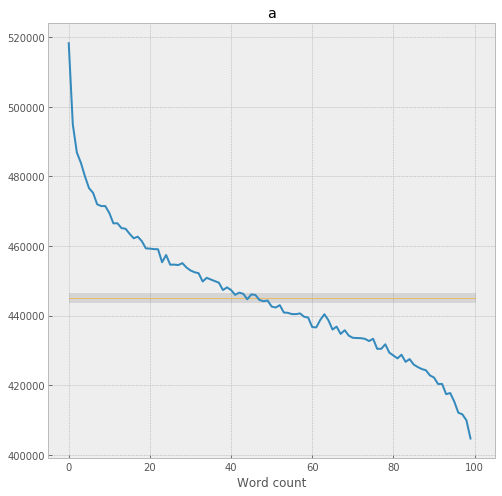

an


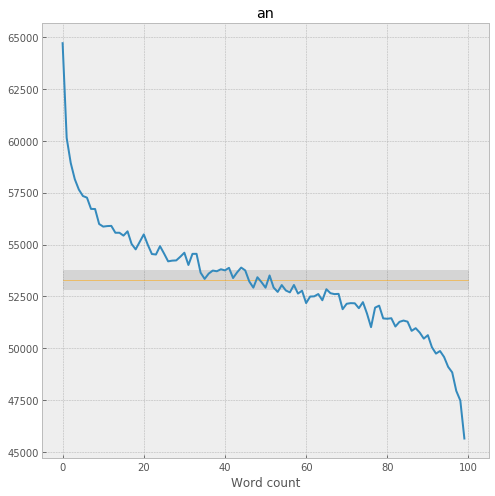

the


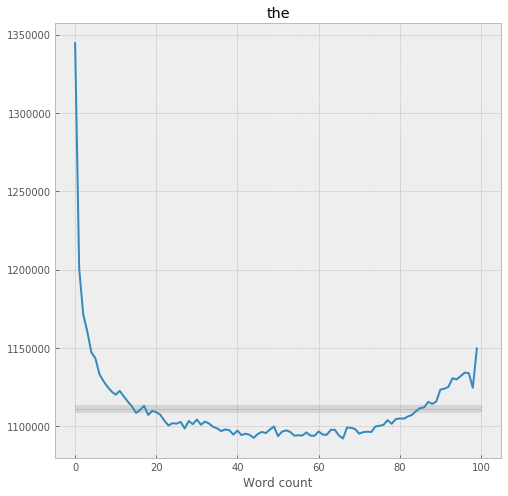

In [41]:
plot_series('a')
plot_series('an')
plot_series('the')

In [47]:
from joblib import Memory

mem = Memory('cache')

token_counts = mem.cache(BinCount.token_counts)

tokens = token_counts(10000)

,


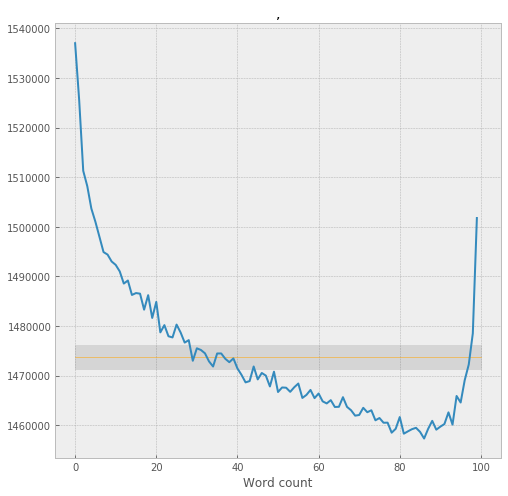

.


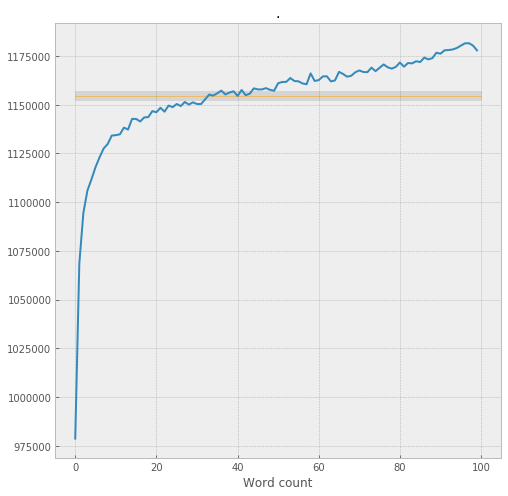

the


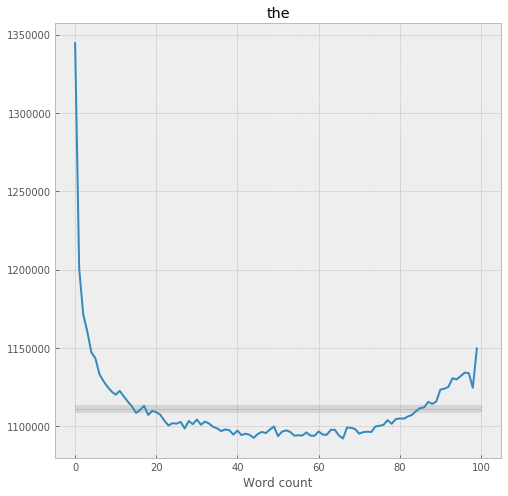

and


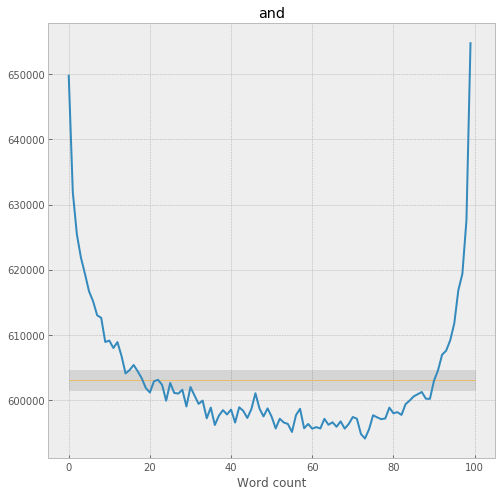

to


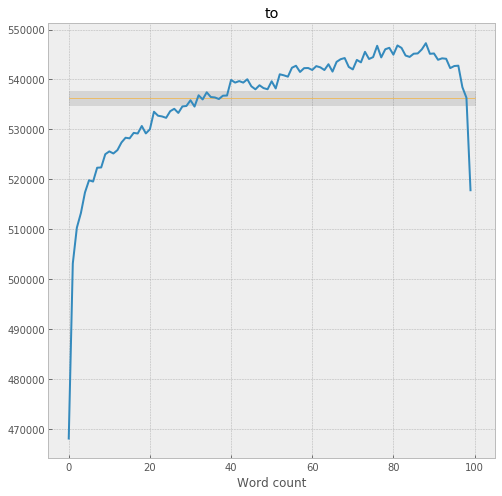

of


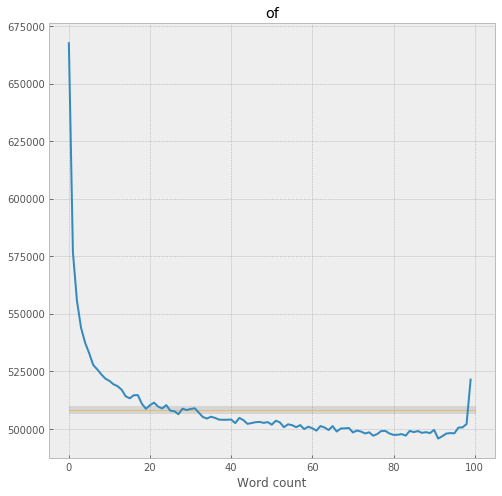

a


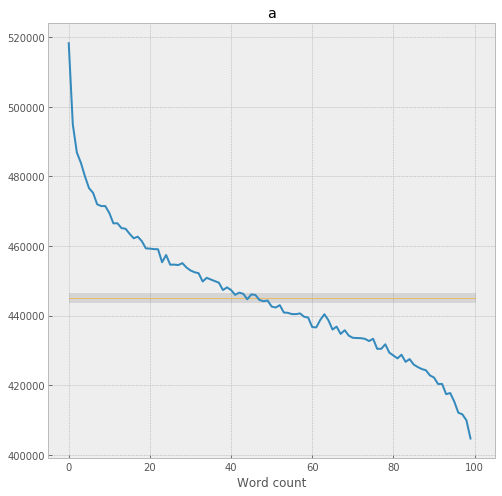

”


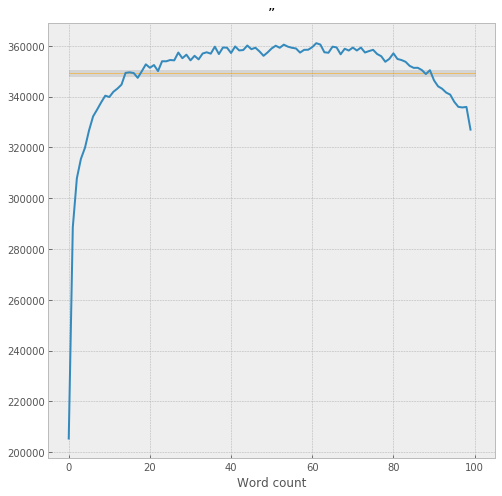

i


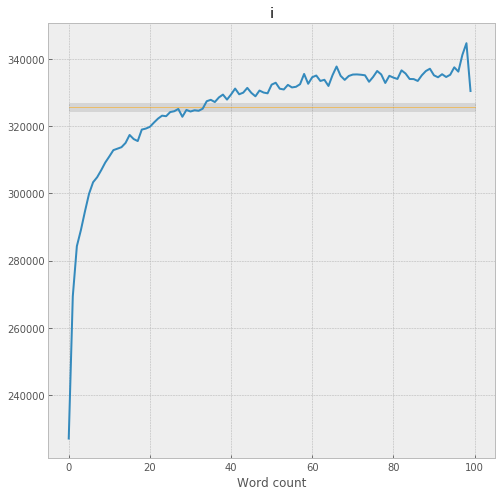

in


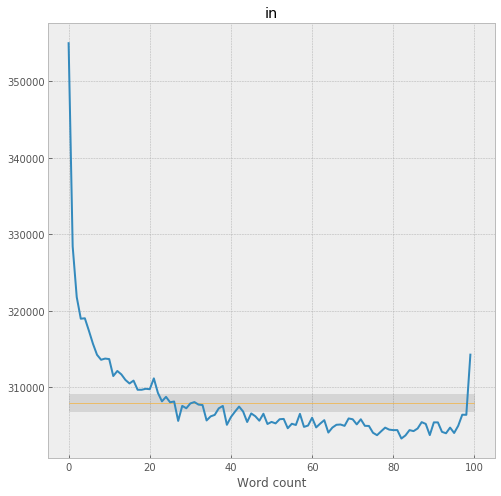

he


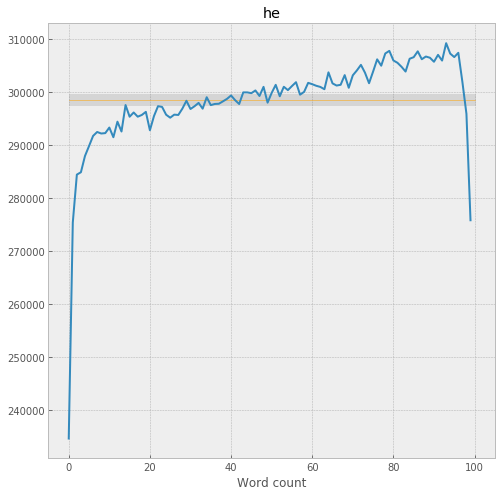

was


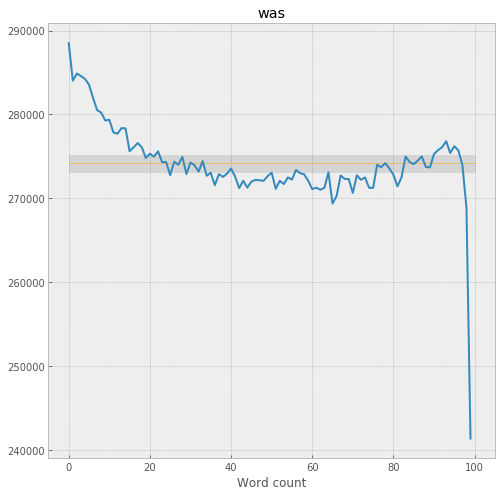

that


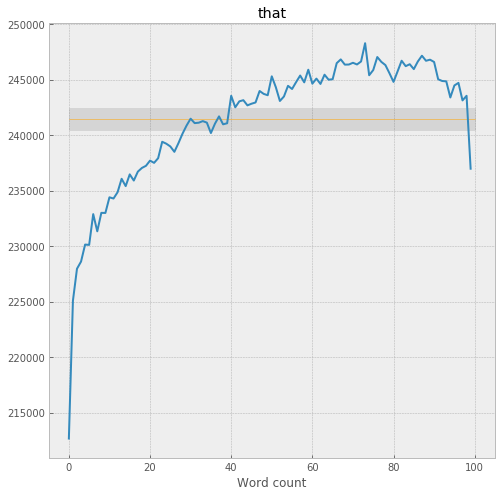

it


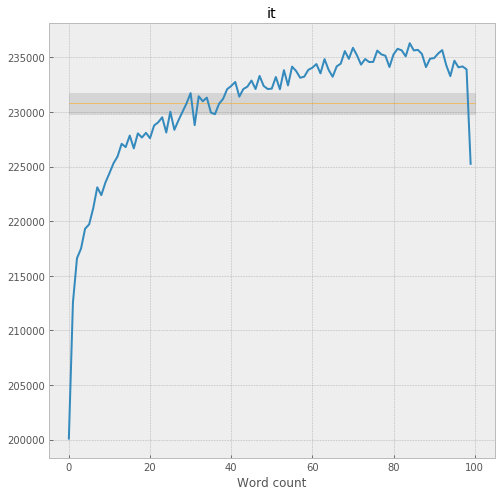

his


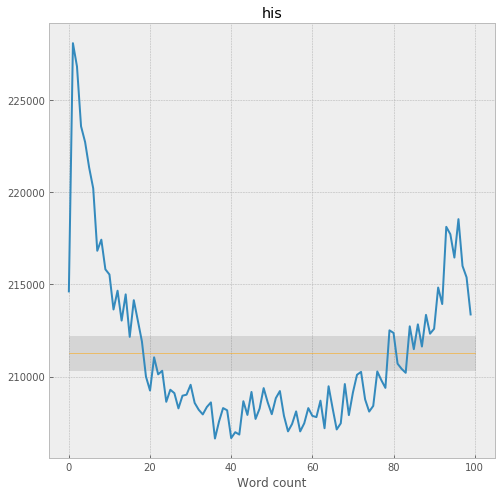

you


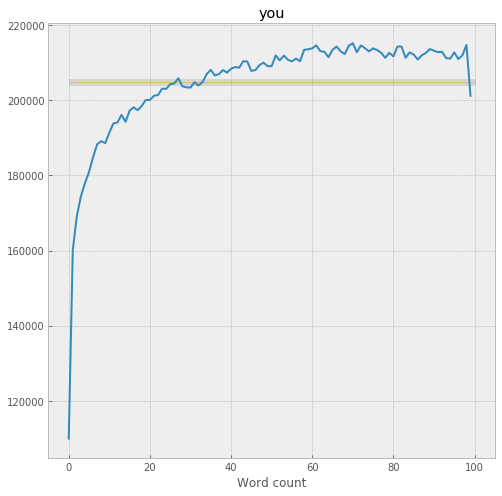

her


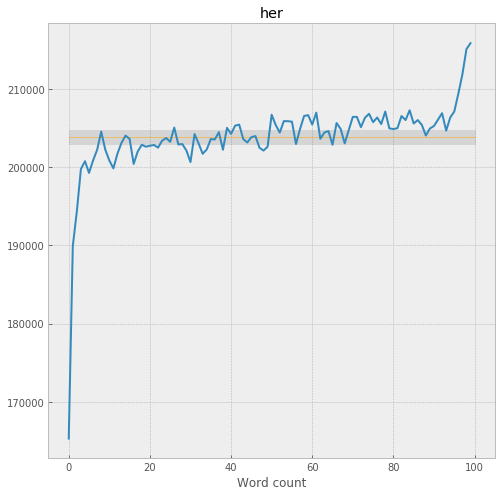

she


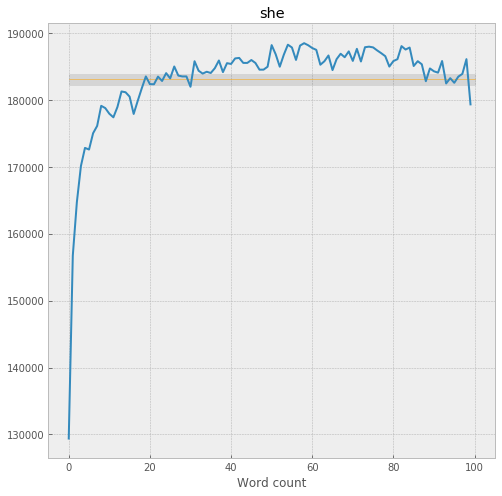

had


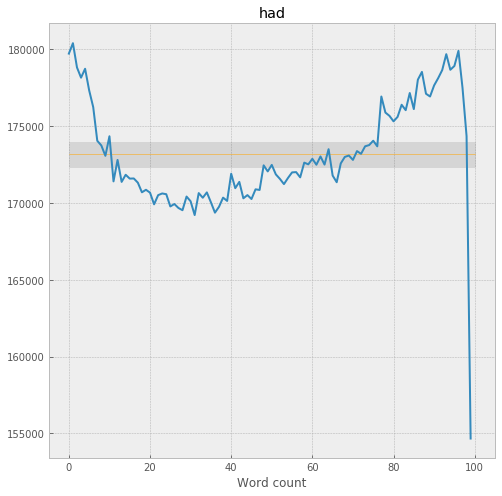

“


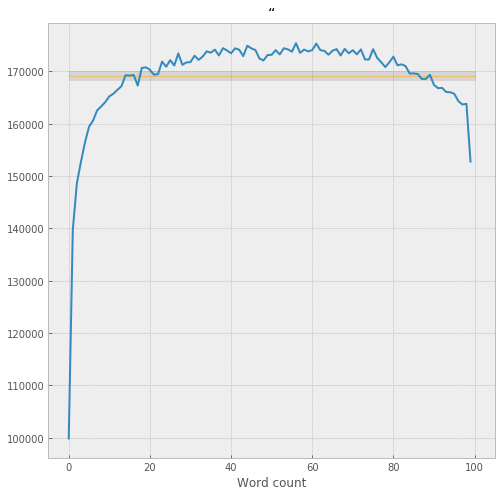

with


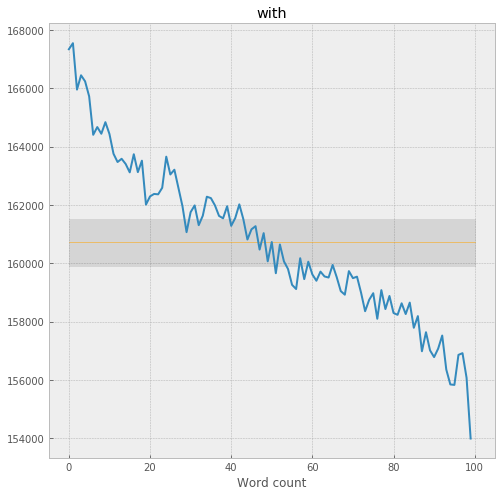

for


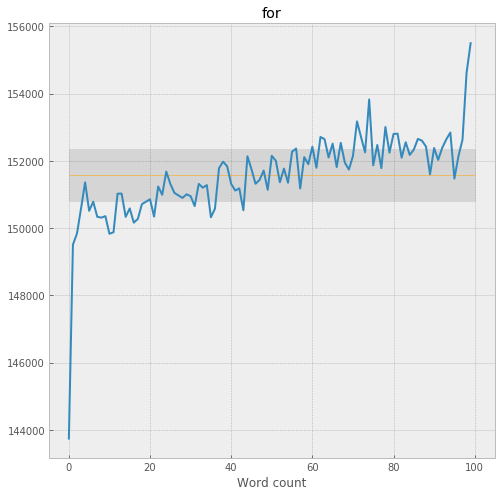

as


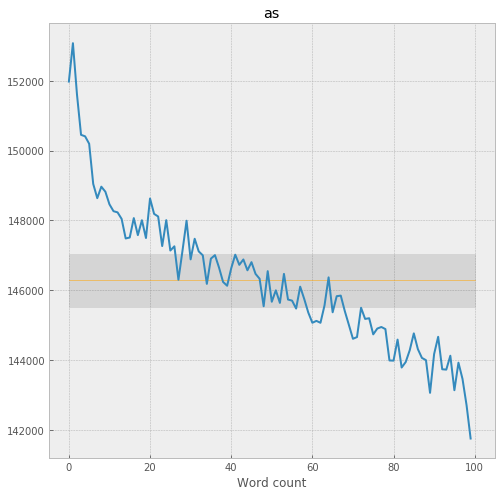

?


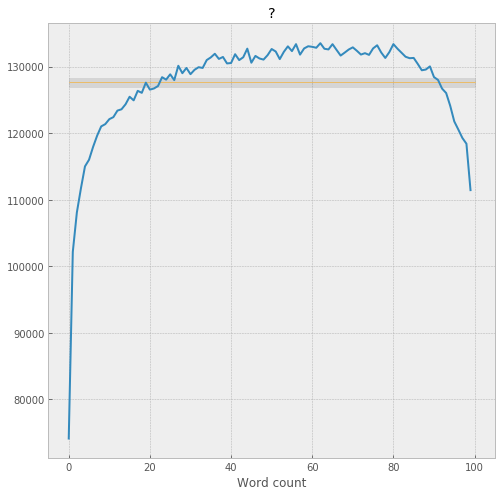

but


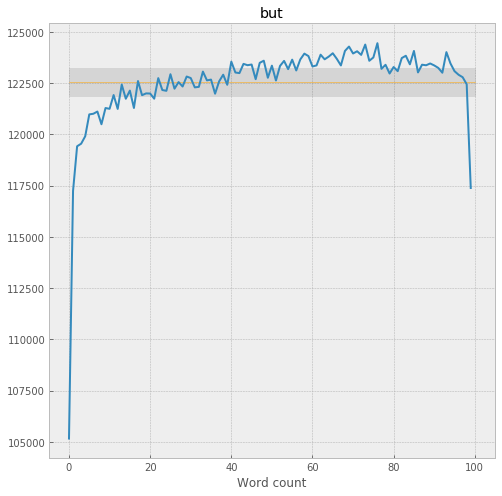

at


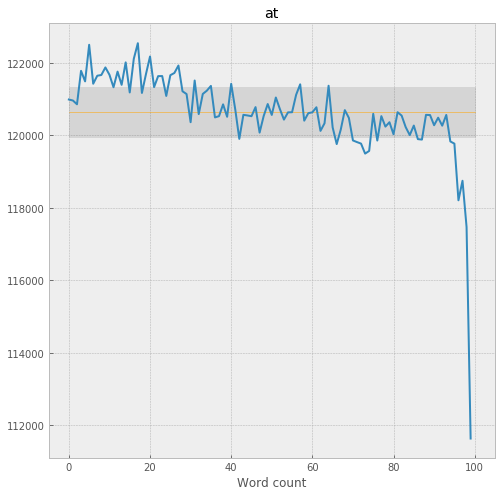

on


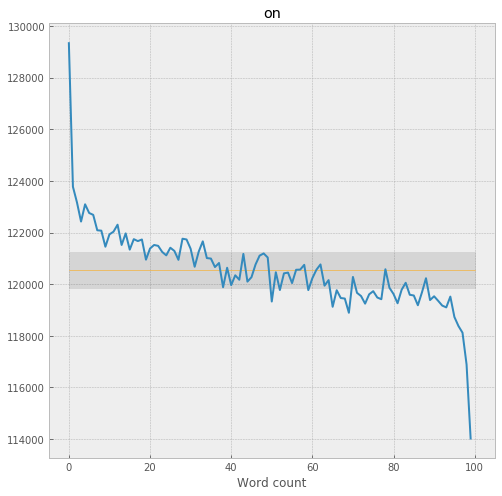

not


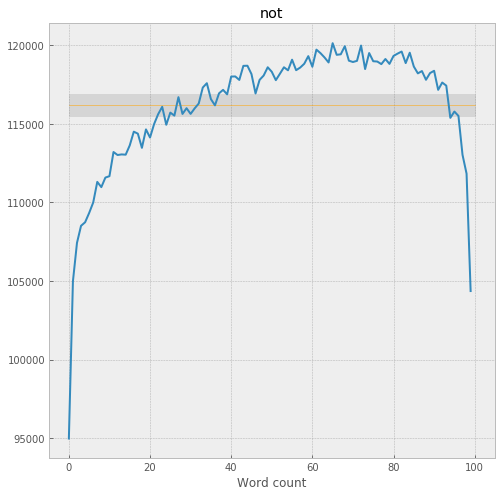

is


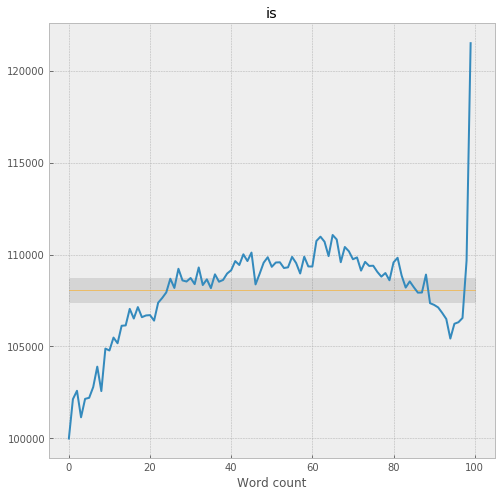

him


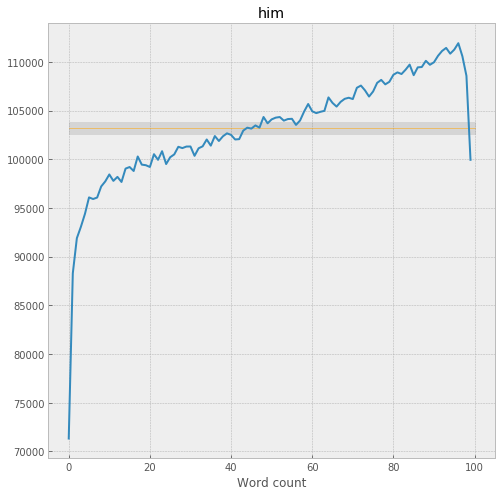

be


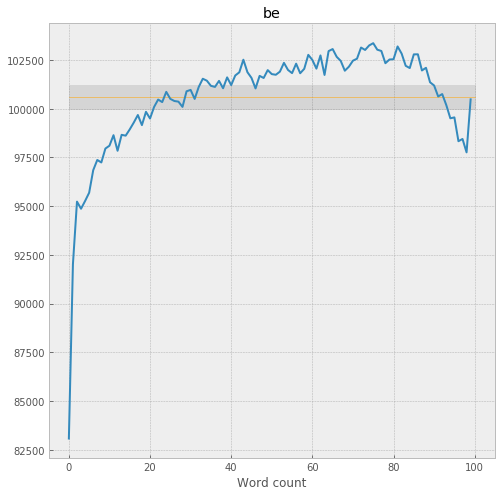

;


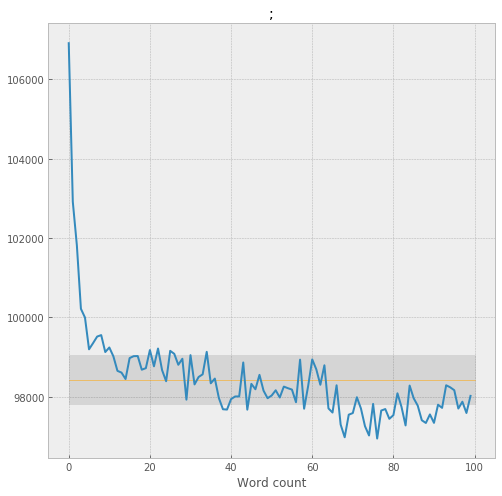

have


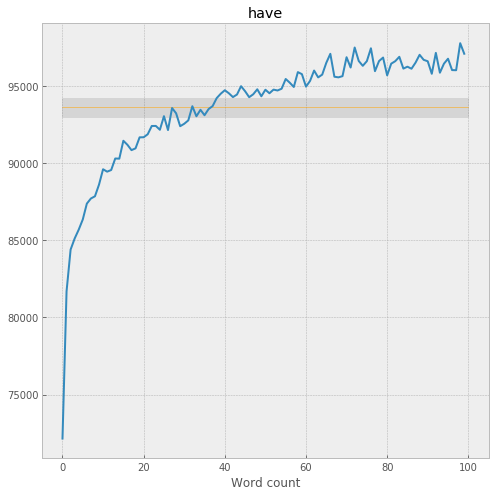

said


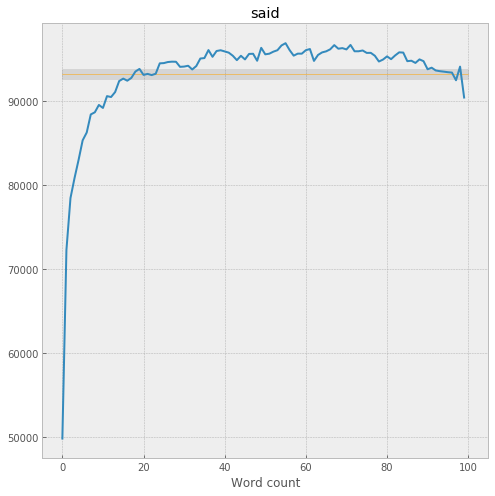

my


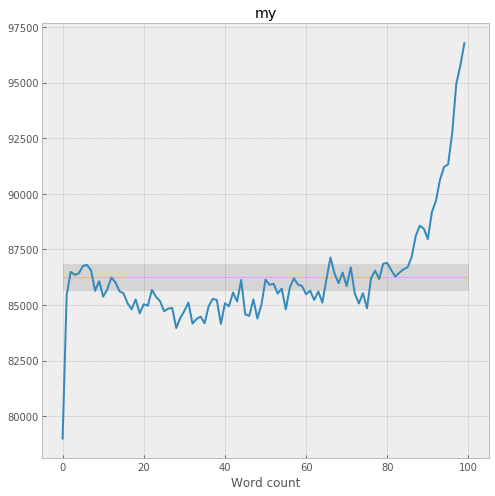

me


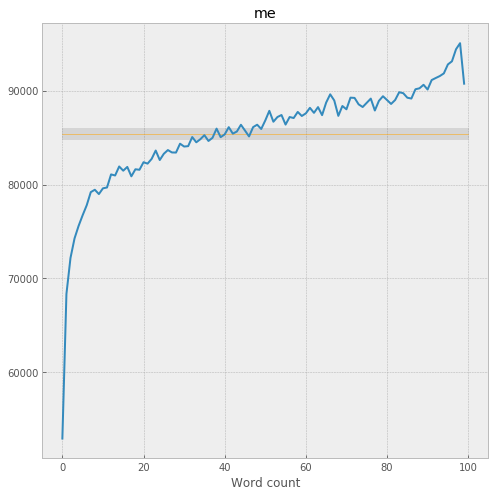

from


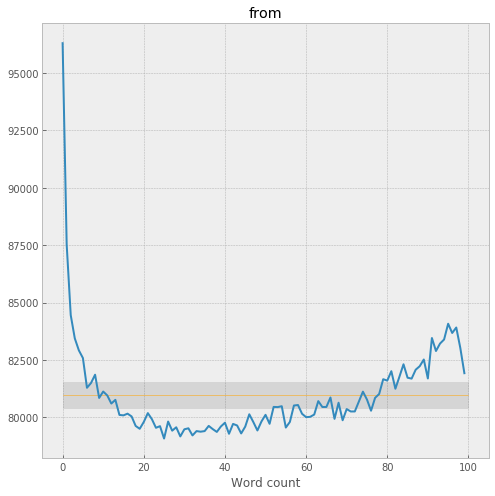

!


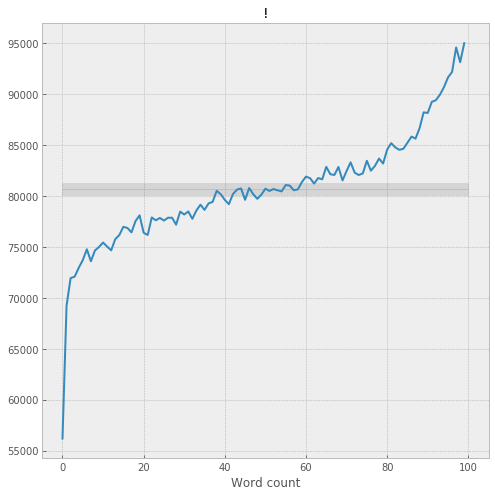

they


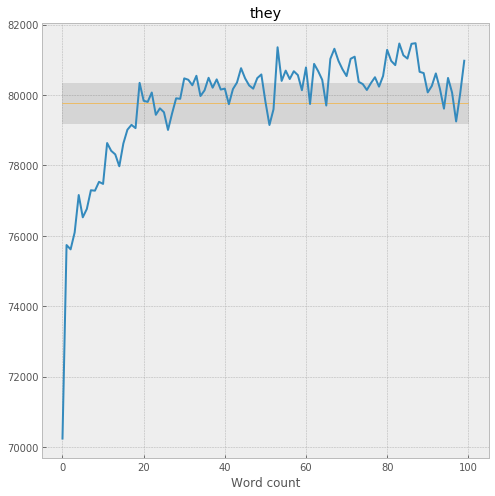

"


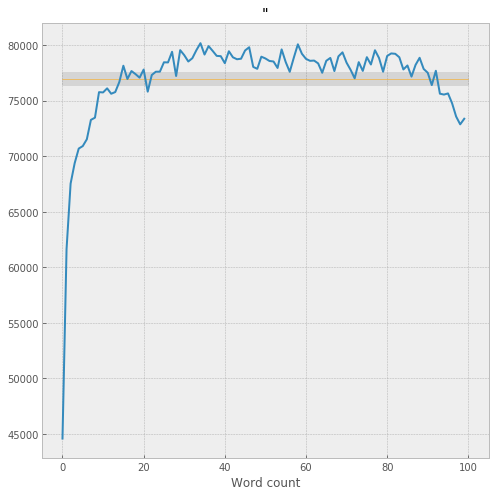

all


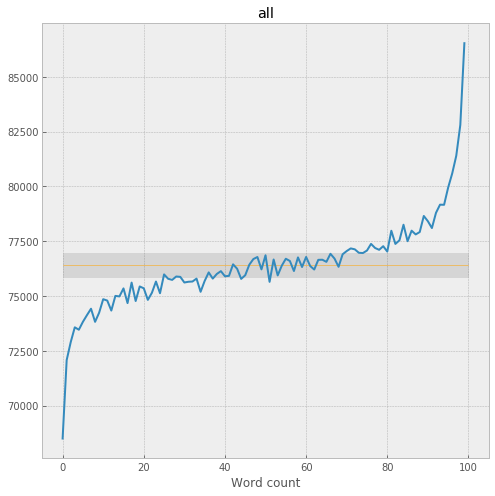

this


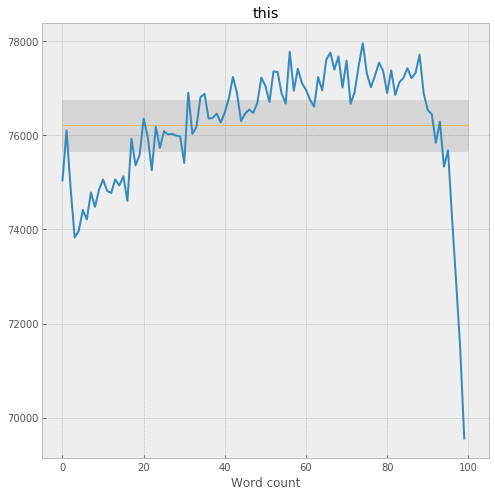

were


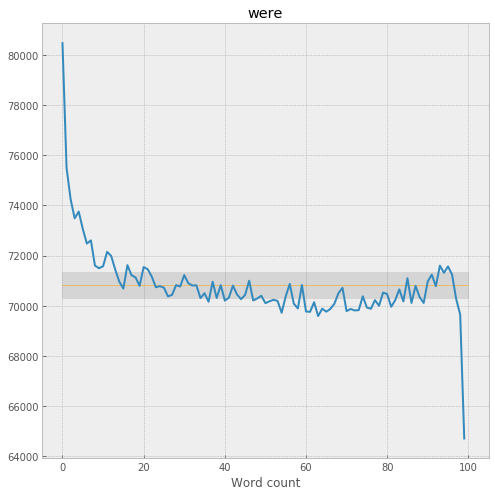

would


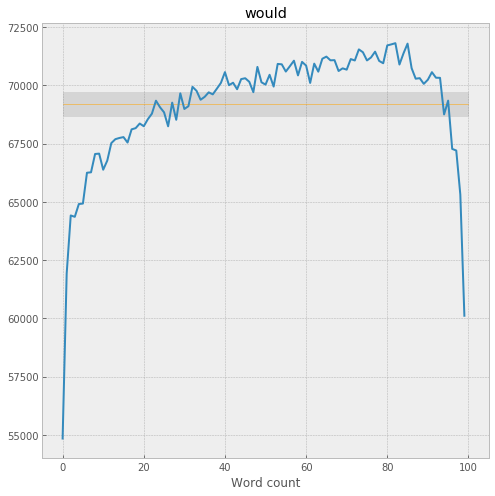

so


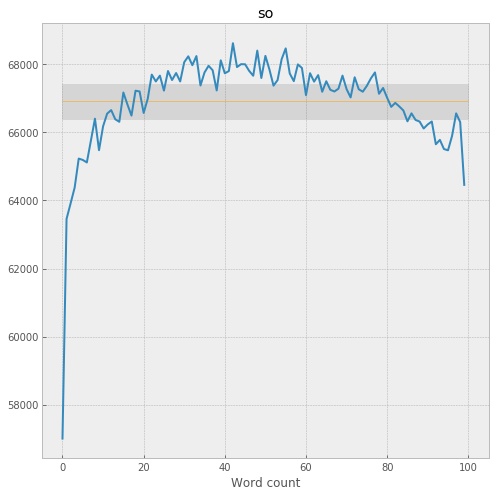

one


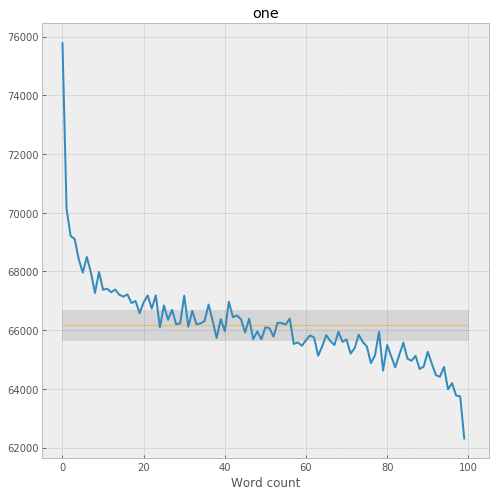

by


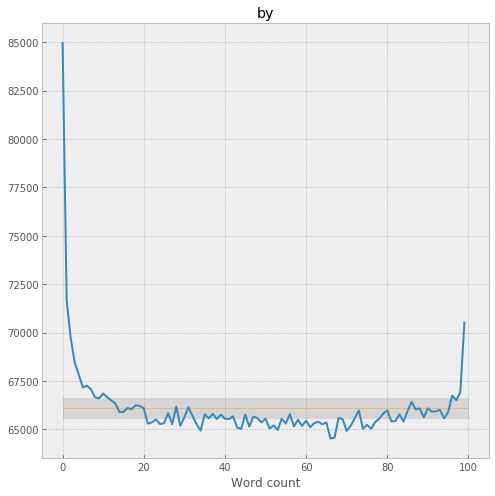

what


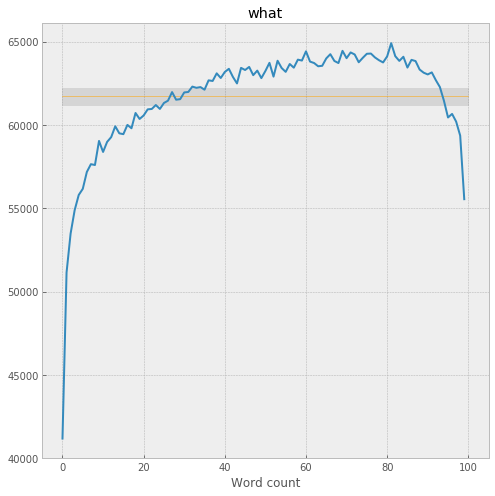

there


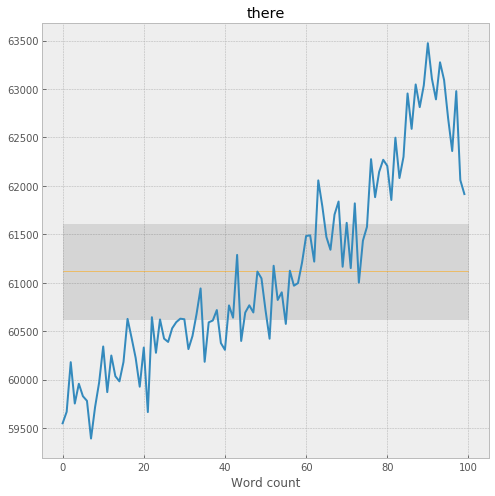

if


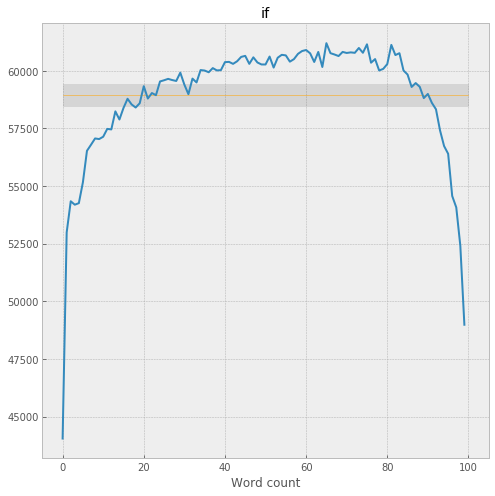

In [52]:
for token, _ in list(tokens.items())[:50]:
    plot_series(token)

a


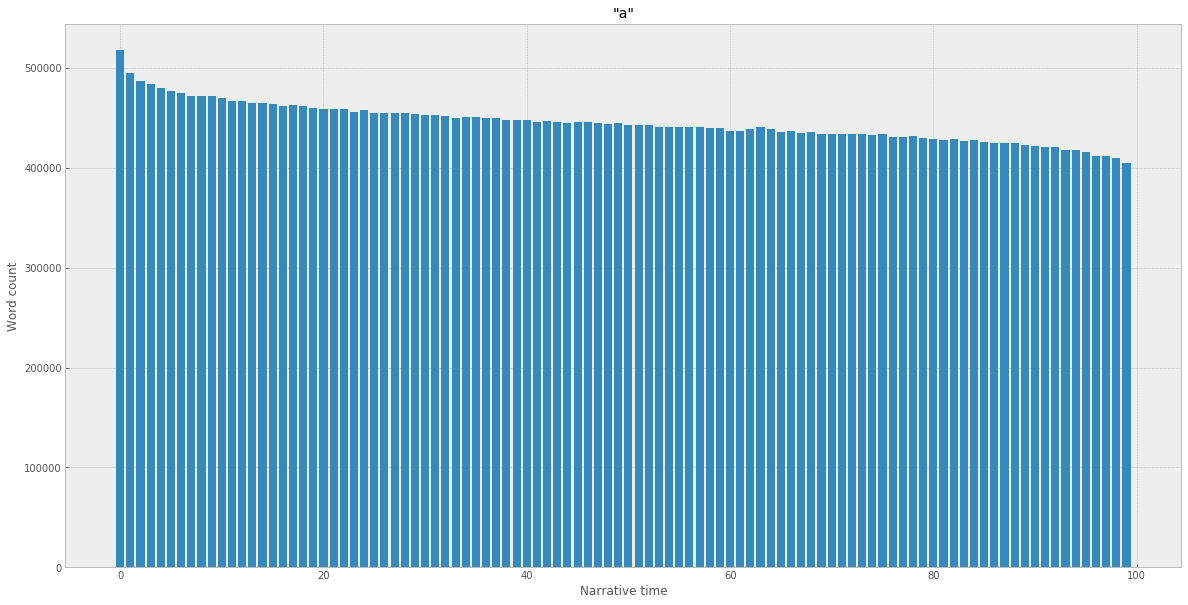

noisy


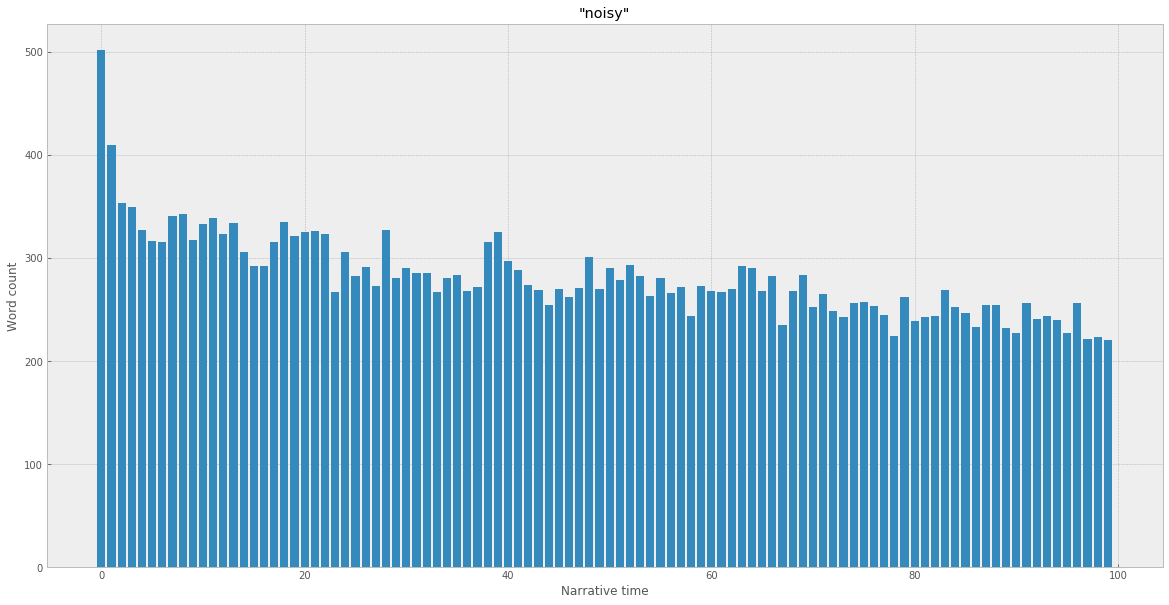

In [68]:
plot_hist('a')
plot_hist('noisy')

a


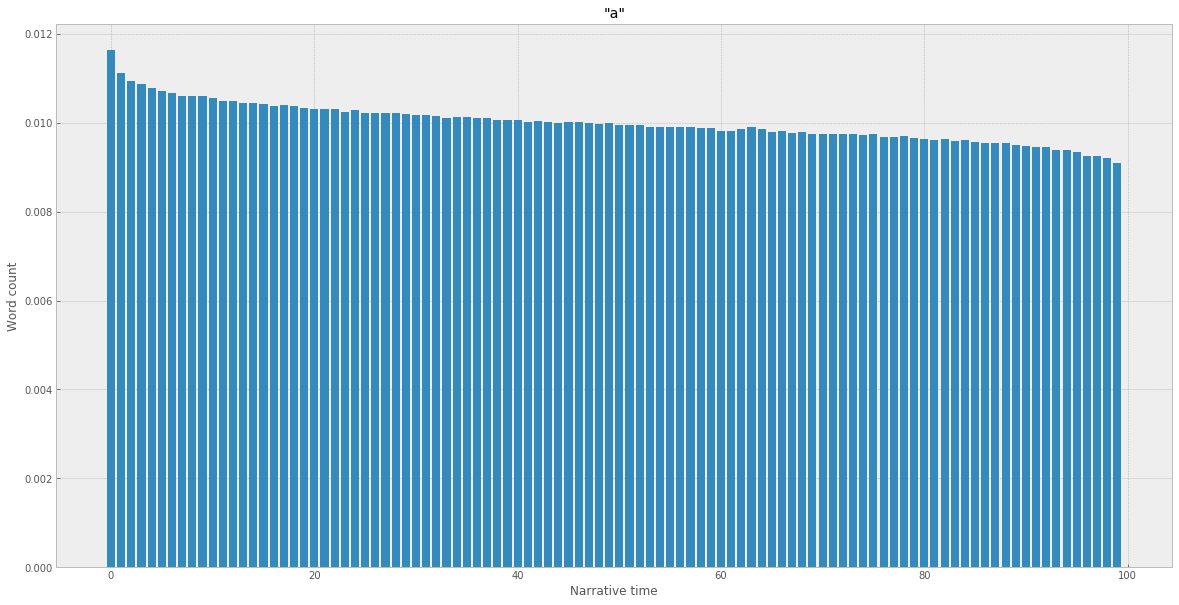

noisy


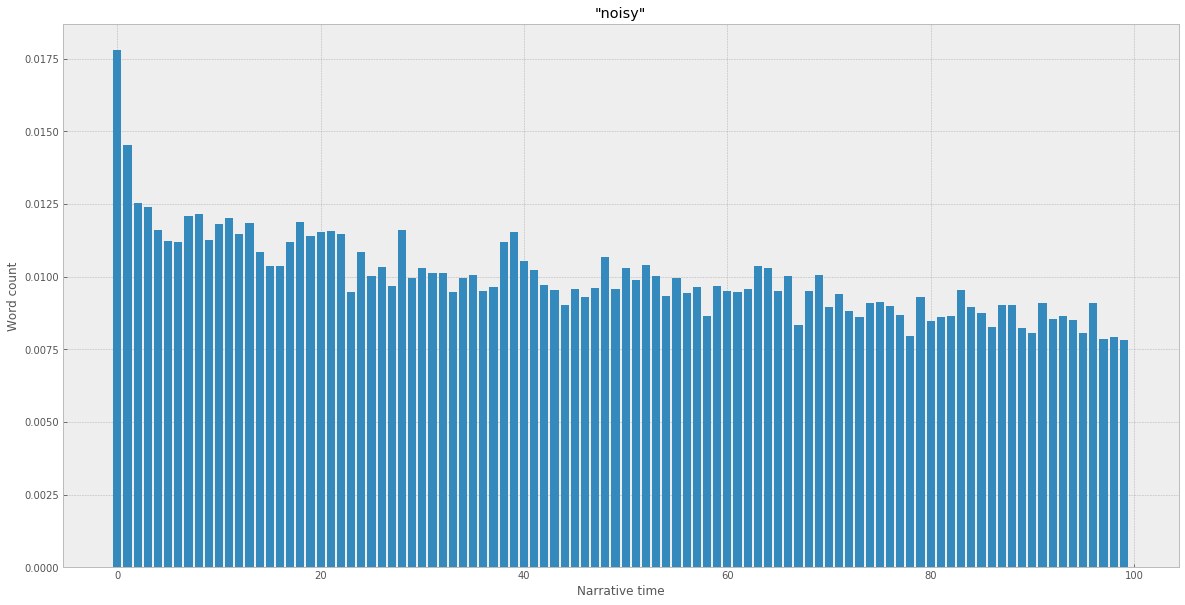

In [70]:
plot_hist('a', rel=True)
plot_hist('noisy', rel=True)